# ODE Interpolation

In [1]:
import numpy as np
from matplotlib import pyplot as plt

## Problem 1
Consider the ODE $y' = f(t,y)$. Construct the interpolating polynomial $p_2(t)$ of $y(t_n - \Delta t)$, $y(t_n)$, and $y(t_n + \Delta t)$. Approximate $y'(t_n + \Delta t)$ by ${p}_{2}'(t_n + \Delta t)$ to derive the backward differentiation formula (BDF) method:

\begin{align}
\frac{3y_{n+1} - 4y_{n} + y_{n-1}}{2\Delta t} = f(t_{n+1}, y_{n+1})
\end{align}

#### Solution
In order to find the second degree interpolating polynomial. We use lagrange interpolation with nodes at . Firstly, let 

We have the following:

\begin{align*}
p_{2}(t) = \frac{(t- t_n)(t-(t_{n}-\Delta t))}{((t_{n}+\Delta t) - t_{n})((t_{n}+\Delta t) - (t_{n}-\Delta t))}y(t_{n} + \Delta t) +\\
\frac{(t- t_n)(t-(t_{n}+\Delta t))}{((t_{n}-\Delta t) - t_{n})((t_{n}-\Delta t) - (t_{n}+\Delta t))}y(t_{n} - \Delta t)+ \\
\frac{(t-(t_{n}-\Delta t))(t-(t_{n}+\Delta t))}{(t_{n} - (t_{n}-\Delta t))(t_{n} - (t_{n}+\Delta t))}y(t_{n})
\end{align*}

Which then can be simplified by foiling the numerators and differentiated in respect to $t$ to get:

\begin{align*}
p_{2}'(t) = \frac{2t-2t_{n} +\Delta t}{((t_{n}+\Delta t) - t_{n})((t_{n}+\Delta t) - (t_{n}-\Delta t))}y(t_{n} + \Delta t) +\\
\frac{2t- 2t_n -2\Delta t}{((t_{n}-\Delta t) - t_{n})((t_{n}-\Delta t) - (t_{n}+\Delta t))}y(t_{n} - \Delta t)+ \\
\frac{2t-2t_{n}}{(t_{n} - (t_{n}-\Delta t))(t_{n} - (t_{n}+\Delta t))}y(t_{n})
\end{align*}

And now plugging in $t = t_{n} + \Delta t$ into the derivative of the polynomial we get:
\begin{align*}
p_{2}'(t_{n}+\Delta t) = \frac{3\Delta t y_{n+1}}{(\Delta t)(2\Delta t)} + \frac{\Delta t y_{n-1}}{(-\Delta t)(-2\Delta t)} + \frac{2\Delta t y_{n}}{(-\Delta t)(\Delta t)}
\end{align*}

Which simplifies to:
\begin{align*}
p_{2}'(t_{n} + \Delta t) = \frac{3y_{n+1} - 4y_{n} + y_{n-1}}{2\Delta t}
\end{align*}

Which is the desired result.

___

## Problem 2
Show that the local truncation error of the midpoint is $O(\Delta t)^{3}$.


#### Solution
By definiion we have that the local truncation error $\tau_{n+1}$ is defined as:

$$
\tau_{n+1} = y(t_{n+1}) - [y(t_n)  + \Delta t\Phi(t_n, y(t_n), \Delta t)]
$$

Thus for the midpoint method we have:
$$
\tau_{n+1} = y(t_{n+1}) - y(t_n) - \Delta t f\left(t_{n+1/2}, y(t_n) + \frac{\Delta t}{2}f(t_{n}, y(t_{n})\right)
$$

Which we can then taylor expand $f$ around $(t_n, y(t_n))$ to get:
\begin{align*}
f\left(t_{n+1/2}, y(t_n) + \frac{\Delta t}{2}f(t_{n}, y(t_{n})\right) = f(t_n, y(t_n)) + \frac{\Delta t}{2}\frac{\partial f}{\partial t}(t_n, y(t_n)) + \frac{\Delta t}{2}f(t_n, y(t_n))\frac{\partial f}{\partial y}(t_n, y(t_n)) + O(\Delta t)^{2}
\end{align*}

However, notice that $y' = f, y'' = f'$ amd furthermore that:
$$
f' = \frac{\partial f}{\partial t} + \frac{\partial f}{\partial y}y' = \frac{\partial f}{\partial t}+\frac{\partial f}{\partial y}f
$$
Thus,

\begin{align*}
f\left(t_{n+1/2}, y(t_n) + \frac{\Delta t}{2}f(t_{n}, y(t_{n})\right) = y'(t_n)+\frac{1}{2}\Delta ty''(t_n) + O(\Delta t)^{2}
\end{align*}

But we also have:
\begin{align*}
y(t_{n+1})= y(t_n) + \Delta ty'(t_n) + \frac{1}{2}(\Delta t)^{2}y''(t_n) + O(\Delta t)^{3}
\end{align*}

Then by substitution of the above two equations with the original truncation error for the mid point we end up with:
$$
\tau_{n+1} = O(\Delta t)^{3}
$$

___

## Problem 3
Consider the initial value problem 

\begin{align}
& y'(t) = \frac{3\cos(t)}{y^{2}(t)}, \quad 0 < t \leq \pi \\
& y(0) = 1.
\end{align}

#### Part A
Find the exact solution of $(2)-(3)$

#### Solution
To solve this analytically we first rewrite the equation as:

\begin{align*}
& y' = \frac{3\cos(t)}{y^{2}} \iff y^{2}\textrm{d}y = 3\cos(t)\textrm{d}t
\end{align*}

Which we then integrate both sides of to get:

$$
\int y^{2}\textrm{d}y = \int 3\cos(t)\textrm{d}t \iff \frac{y^{3}}{3} = 3\sin(t) + c
$$
And now solving for $y$:

$$
y = \sqrt[3]{9\sin(t)+ c} 
$$
So now we must solve the initial value problem with the given information.

$$
y(0) = \sqrt[3]{9\sin(0)+ c} = \sqrt[3]{c} = 1 \iff c = 1
$$

Which gives the final solution,

$$
y(t) = \sqrt[3]{9\sin(t)+ 1} 
$$

Next I write it in code so we can use it to compare to the numerical solution.

In [2]:
y = lambda t: (9*np.sin(t) + 1)**(1/3)

#### Part B
Implement Euler's method to find an approximate solution to $(2)-(3)$. Using the exact solution to verify the first order rate of convergence of the approximation.

#### Solution
Firstly I define the function that will handle the forward Euler's Method. This will be used to generate the values.

In [3]:
def forwardEuler(initial_conditions, f, N, T):
    del_t = T/N
    t_0, alpha = initial_conditions
    t_n_arr = np.array([del_t * i for i in range(N+1)])
    y_n_arr = np.array([alpha])
    
    for n, t_n in enumerate(t_n_arr[1:]):
        y_n_arr = np.append(y_n_arr, y_n_arr[n] + del_t*f(t_n, y_n_arr[n]))    
        
    return t_n_arr, y_n_arr

Next to verify the first order rate of convergence lets take the point $y(\pi) = 1$. If we double the amount of nodes we should expect to see the ratios of the errors decrease by a factor of 2. We verify this below.

In [4]:
y_prime = lambda t, y_n: (3*np.cos(t))/(y_n**2)
t_300, y_300 = forwardEuler((0,1), y_prime, 300, np.pi)
t_600, y_600 = forwardEuler((0,1), y_prime, 600, np.pi)

print("N: {0}, y(t): {2:.7f}, Error: {1:.7f}".format(300, 1-y_300[-1], y_300[-1]))
print("N: {0}, y(t): {2:.7f}, Error: {1:.7f}".format(600, 1-y_600[-1], y_600[-1]))
print("Error ratio (doubling nodes): {0:0.7f}".format((1-y_300[-1])/(1-y_600[-1])))

N: 300, y(t): 1.0109992, Error: -0.0109992
N: 600, y(t): 1.0055923, Error: -0.0055923
Error ratio (doubling nodes): 1.9668369


As seen above, the ratio of the error is 2 when we doubled the number of nodes. Which means that the convergence is linear.

#### Part C
Plot the approximation obtained with $\Delta t = \pi/300$.

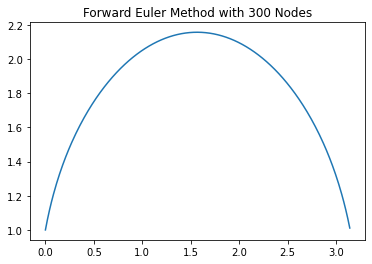

In [5]:
plt.title("Forward Euler Method with 300 Nodes")
plt.plot(t_300,y_300);

___

## Problem 4
Consider the pendulum with friction modeled by the second order ODE:
\begin{align}
\theta'' + \alpha \theta' + \omega^{2}\theta = 0,
\end{align}
where $\theta$ is the angle the pendulum makes with the vertical axis, $\alpha$ is a friction coefficient and $\omega$ is the pendulum's natural frequency.

#### Part A
Turn (4) into a first order system.


#### Solution
In order to turn this into a first order system, set $u_1 = \theta'$, now let $u_{2}=u_{1}' = \theta'$.

Thus we now have the system:

\begin{align*}
& u_{2} = u_{1}'\\
&u_{2}' = -\alpha u_{2} - \omega^{2}u_1
\end{align*}

#### Part B
Use Euler's method to find an approximation to the solution in $[0,5]$ with initial conditions $\theta(0) = 1$ and $\theta'(0) = 0$. Take $\alpha =0.2$ and $\omega = 2$. Verify the expected order of convergence and plot the approximation for a sufficiently small $\Delta t$.

#### Solution
With our new first order system, we plug in the values given. 

We now have the initial conditions:

\begin{align*}
& u_{1}(0) = \theta(0)= 1 \\
&u_{2}(0)= u_{1}'(0) = \theta'(0) = 0\\
\end{align*}

And the system:

\begin{align*}
& u_{2} = u_{1}'\\
&u_{2}' = -0.2 u_{2} - 4u_1
\end{align*}

So now to apply the Forward Euler Method we use it on both components simultaneously as:

\begin{align*}
& \theta_{n+1} = u_1(t_{n+1}) = u_{1}(t_{n}) + \Delta tu_{1}'(t_{n}) = u_{1}(t_{n}) + \Delta tu_{2}(t_{n})\\
& \theta_{n+1}'= u_{2}(t_{n+1}) = u_{2}(t_{n}) + \Delta t u_{2}'(t_{n}) = u_{2}(t_{n}) + \Delta t \left[-0.2u_{2}(t_n) - 4u_{1}(t_{n})\right]
\end{align*}

Thus we implement this in code in the next cell.

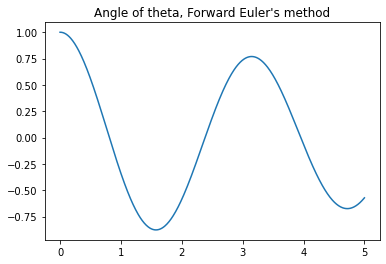

In [6]:
def forwardEulerSecondOrder(initial_conditions, f, N, T):
    del_t = T/N    
    alpha_1, alpha_2 = initial_conditions
    
    t_n = np.array([del_t * i for i in range(N+1)])
    
    u_1 = np.array([alpha_1])
    u_2 = np.array([alpha_2])
    
    for n, t in enumerate(t_n[1:]):
        u_1 = np.append(u_1, u_1[n] + del_t*u_2[n])
        u_2 = np.append(u_2, u_2[n] + del_t*(f(u_1[n],u_2[n])))
        
    return (t_n, u_1, u_2)

f = lambda x,y: -0.2*y-4*x
t, theta, theta_pr = forwardEulerSecondOrder((1,0), f, 600, 5)
plt.title("Angle of theta, Forward Euler's method")
plt.plot(t, theta);

Now to show that the expected order of convergence is indeed linear which is expected of the Euler method, we look at the ratio of doubled and quadrupled amount of nodes which should again be close to 2. Since we are doubling the amount of nodes each time. We don't have an explicit solution for theta, so we must do it in this way.

In [7]:
t_150, theta_150, theta_pr_150 = forwardEulerSecondOrder((1,0), f, 150, 5)
t_300, theta_300, theta_pr_300 = forwardEulerSecondOrder((1,0), f, 300, 5)
t_600, theta_600, theta_pr_600 = forwardEulerSecondOrder((1,0), f, 600, 5)

print("N: {0}, theta(5): {1:.7f}".format(150, theta_150[-1]))
print("N: {0}, theta(5): {1:.7f}".format(300, theta_300[-1]))
print("N: {0}, theta(5): {1:.7f}".format(600, theta_600[-1]))
print("Error ratio (doubling nodes): {0:0.7f}".format(
    (theta_300[-1]-theta_150[-1])/(theta_600[-1]-theta_300[-1])))

N: 150, theta(5): -0.7306027
N: 300, theta(5): -0.6203402
N: 600, theta(5): -0.5726199
Error ratio (doubling nodes): 2.3106021


As Seen above, doubling the nodes gives us an error ratio of about 2! So the linear rate of convergence is attained as expected.